# Stock market analysis using data from the Yahoo-Finance Web API

## Libraries and settings

In [36]:
# Libraries
import os
import ta
import fnmatch
import pandas as pd
import yfinance as yf           # Yahoo Finance API-Wrapper 
from datetime import datetime
import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/Users/nico/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Anji&Nico/Nico/03_Bildung_und_Sport/Schule/ZHAW/Master/01_Arbeitsordner/001_Repo_Clones/data_ingestion/05_Yahoo_Finance_WebAPI (ohne backtesting)


#### **Zusammenfassung der Librarie: Yfinance**. 
##### Yfinance ist ein inoffizieller Python‑Wrapper, der Yahoo Finance‑Daten in Pandas-DataFrames zurückliefert


##### **yf.download**
##### Wichtige Prameter:
- **tickers** (z. B. 'MSFT' oder ['MSFT','AAPL'])
- **start, end** (YYYY-MM-DD) oder period ('1y','6mo'...)
- **interval** ('1d','1h','5m' — Achtung: Intraday nur für kürzere Perioden)
- **group_by** ('ticker' oder default)
- **auto_adjust** (True/False) — berechnet automatische Adjusted Close
- **threads** (True/False) — paralleles Herunterladen
##### Rückgabe: DataFrame mit Spalten Open, High, Low, Close, Adj Close, Volume (bei mehreren Ticker MultiIndex möglich).

##### **yf.Ticker**
- ticker = yf.Ticker('MSFT')
- ticker.history(period='1y', interval='1d') — wie yf.download, aber per Ticker
- ticker.info — dict mit Metadaten (Company name, sector, marketCap ...)
- ticker.fast_info — kompakteres Info-Objekt (je nach yfinance-Version)
- ticker.actions — DataFrame mit Dividenden & Splits
- ticker.dividends — Series
- ticker.splits — Series
- ticker.earnings, ticker.quarterly_earnings — DataFrames
- ticker.financials, ticker.balance_sheet, ticker.cashflow — DataFrames (jährlich)
- ticker.get_recommendations() — Analysten‑Empfehlungen (wenn verfügbar)
- ticker.options — list von Expiration-Dates; ticker.option_chain(date) — Optionen-DataFrame



## Get data
List of stock market symbols: https://finance.yahoo.com/lookup

In [41]:
# Retrieve the Microsoft stock data from Yahoo finance / normal Ticker download
today = datetime.now().strftime("%Y-%m-%d")
print('Today is:', today)

data = yf.download('MSFT', start = "2022-01-01", end = today, progress=False)
data.tail()
# data.info()

Today is: 2025-11-03


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-10-27,531.520020,534.580017,529.010010,531.780029,18734700
2025-10-28,542.070007,553.719971,540.770020,550.000000,29986700
2025-10-29,541.549988,546.270020,536.729980,544.940002,36023000
2025-10-30,525.760010,534.969971,522.119995,530.479980,41023100
2025-10-31,517.809998,529.320007,515.099976,528.880005,33978900


In [33]:
# Option um mehrere Ticker gleichzeitig herunterzuladen:
temp = yf.download(['AAPL','MSFT'], start='2023-01-01', group_by='ticker')
# temp.head()

# Abfragen der Daten:
temp['AAPL']['Close'] # Zugriff auf Apple Close Preise

[*********************100%***********************]  2 of 2 completed


Date
2023-01-03    123.330635
2023-01-04    124.602707
2023-01-05    123.281334
2023-01-06    127.817352
2023-01-09    128.339996
                 ...    
2025-10-27    268.809998
2025-10-28    269.000000
2025-10-29    269.700012
2025-10-30    271.399994
2025-10-31    270.369995
Name: Close, Length: 711, dtype: float64

In [40]:
# Erweiterte Ticker-Funktionalität
# Mit der Ticker-Klasse können weitere Informationen und Daten abgerufen werden
# wie Dividenden, Gewinnberichte, Optionsdaten usw.

# Beispiel für Microsoft:
t = yf.Ticker('MSFT')

# 1. Historische Daten der letzten 6 Monate
print("\n=== Historische Daten (letzte 5 Tage) ===")
hist = t.history(period='6mo', interval='1d')
print(hist.tail())

# 2. Basis-Informationen zum Unternehmen
print("\n=== Basis-Informationen ===")
info = t.info
print(f"Name: {info.get('longName', 'N/A')}")
print(f"Sektor: {info.get('sector', 'N/A')}")
print(f"Industrie: {info.get('industry', 'N/A')}")
print(f"Land: {info.get('country', 'N/A')}")
print(f"Website: {info.get('website', 'N/A')}")

# 3. Dividenden (letzte 5)
print("\n=== Letzte Dividenden ===")
divs = t.dividends
print(divs.tail())

# 4. Gewinnzahlen (jährlich)
print("\n=== Gewinnzahlen (jährlich) ===")
earnings = t.earnings
print(earnings)

# 5. Options-Daten (wenn verfügbar)
print("\n=== Options-Daten ===")
options_dates = t.options
print("Verfügbare Options-Termine:", options_dates[:5] if options_dates else "Keine")

if options_dates:
    print("\nErste Options-Kette:")
    opt = t.option_chain(options_dates[0])
    print("\nCall Options (erste 3):")
    print(opt.calls[['strike', 'lastPrice', 'volume', 'impliedVolatility']].head(3))
    print("\nPut Options (erste 3):")
    print(opt.puts[['strike', 'lastPrice', 'volume', 'impliedVolatility']].head(3))


=== Historische Daten (letzte 5 Tage) ===
                                 Open        High         Low       Close  \
Date                                                                        
2025-10-27 00:00:00-04:00  531.780029  534.580017  529.010010  531.520020   
2025-10-28 00:00:00-04:00  550.000000  553.719971  540.770020  542.070007   
2025-10-29 00:00:00-04:00  544.940002  546.270020  536.729980  541.549988   
2025-10-30 00:00:00-04:00  530.479980  534.969971  522.119995  525.760010   
2025-10-31 00:00:00-04:00  528.880005  529.320007  515.099976  517.809998   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-10-27 00:00:00-04:00  18734700        0.0           0.0  
2025-10-28 00:00:00-04:00  29986700        0.0           0.0  
2025-10-29 00:00:00-04:00  36023000        0.0           0.0  
2025-10-30 00:00:00-04:00  41023100        0.0           0.0  
2025-10-31 00:00:00-04:00  33978900    

## Calculate techniqual indicators

In [13]:
# Function to compute Bollinger Bands 
def BBANDS(data, n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data
 
# Compute the Bollinger Bands for Google using the 50-day Moving average
BBANDS = BBANDS(data, 50)
BBANDS

Price,Close,High,Low,Open,Volume,MiddleBand,UpperBand,LowerBand
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,
Date,,,,,,,,
2022-01-03,324.504608,327.655138,319.686719,325.086250,28865100,NaN,NaN,NaN
2022-01-04,318.940216,324.940765,316.138654,324.582065,32674300,NaN,NaN,NaN
2022-01-05,306.696777,316.090204,306.309026,315.886611,40054300,NaN,NaN,NaN
2022-01-06,304.273346,308.945831,301.956480,303.565678,39646100,NaN,NaN,NaN
2022-01-07,304.428467,306.813167,300.599349,304.535086,32720000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-10-27,531.520020,534.580017,529.010010,531.780029,18734700,511.967891,527.857115,496.078668
2025-10-28,542.070007,553.719971,540.770020,550.000000,29986700,512.484266,530.480147,494.488385


## Plot data and techniqual indicators

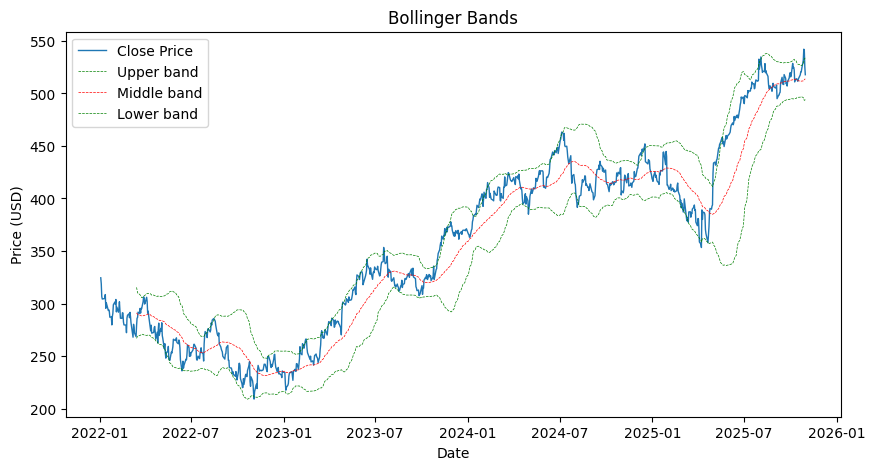

In [14]:
# Create the plot
plt.figure(figsize=(10, 5))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.plot(BBANDS.Close, lw=1.0, label='Close Price')
plt.plot(data['UpperBand'], 'g--', lw=0.5, label='Upper band')
plt.plot(data['MiddleBand'], 'r--', lw=0.5, label='Middle band')
plt.plot(data['LowerBand'], 'g--', lw=0.5, label='Lower band')

# Add a legend to the axis
plt.legend()

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [15]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 25.0.0
Datetime: 2025-11-03 10:21:19
Python Version: 3.9.6
-----------------------------------
